_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_138 (Dense)            (None, 1024)              3146752   
_________________________________________________________________
activation_137 (Activation)  (None, 1024)              0         
_________________________________________________________________
dropout_92 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_139 (Dense)            (None, 512)               524800    
_________________________________________________________________
activation_138 (Activation)  (None, 512)               0         
_________________________________________________________________
dropout_93 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_140 (Dense)            (None, 10)                5130      
__________

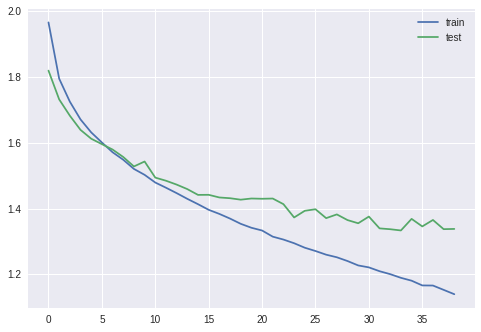

In [53]:
# With early stopping, 55.0% 
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.utils import to_categorical, plot_model
from keras.datasets import cifar10
from keras import optimizers
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from matplotlib import pyplot


# load CIFAR10 Data set
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
no_classes = 10

 



num_labels = len(np.unique(y_train))


y_train = to_categorical(y_train, no_classes)
y_test = to_categorical(y_test, no_classes)

# image dimensions (assumed square), RGB 
image_size = x_train.shape[1]
input_size = image_size * image_size * 3 

# resize and normalize

x_train = x_train.reshape(50000, 32 * 32 * 3)
x_test = x_test.reshape(10000, 32 * 32 * 3)

x_train = x_train.astype('float32') / 255

x_test = x_test.astype('float32') / 255

# network parameters
batch_size = 64
dropout = 0.2

# model is a 3-layer MLP with ReLU and dropout after each layer
model = Sequential()
model.add(Dense(1024, input_dim=input_size))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(num_labels))
# this is the output for one-hot vector
model.add(Activation('softmax'))
model.summary()
#plot_model(model, to_file='mlp-mnist.png', show_shapes=True)

# loss function for one-hot vector
# use of sgd optimizer with default lr=0.01
# accuracy is good metric for classification tasks
sgd = optimizers.SGD(lr=0.01, decay=1e-7, momentum=0.9, nesterov=True)

model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])
# train the network
##es = EarlyStopping(monitor = 'val_loss', mode='min', verbose='1')

##history = model.fit(x_train, y_train, validation_split  = 0.20, epochs=200, batch_size=batch_size,callbacks = [es])

# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience = 5)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)


# fit model
history = model.fit(x_train, y_train, validation_split=0.2, epochs=500, batch_size = batch_size,  verbose=1, callbacks=[es,mc])

saved_model = load_model('best_model.h5')
# evaluate the model
loss_train, train_acc = model.evaluate(x_train, y_train, verbose=0)
loss_test, test_acc = model.evaluate(x_test, y_test, verbose=0)
print('Train: %.1f%%, Test: %.1f%%' % (100*train_acc, 100*test_acc))
# plot training history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

# validate the model on test dataset to determine generalization
##loss, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
##print("\nTest accuracy: %.1f%%" % (100.0 * acc))